#  Python II Individual Assignment 
### Juan Francisco Balbi, GMBD 2022


## 1) Import basic set of libraries for data loading/EDA

In [1]:
# import libraries to be used

import pandas as pd
import numpy as np
import math
import warnings
import missingno as msno
import datetime
np.random.seed(777)

In [2]:
# to allow multiple cells dislay

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## 2) Import files to be used &  display instructions and column key

In [3]:
# set path & variables with file names to be imported

path = ""
instructions_name = "instructions.csv"
key_name = "Data Dictionary - Modeling Task.csv"
dataset_name = "AUTO_LOANS_DATA.csv"

In [4]:
# import files and create pandas dataframes

instructions = pd.read_csv(path + instructions_name,delimiter=";")
column_key = pd.read_csv(path + key_name ,delimiter=";")
data = pd.read_csv(path + dataset_name,delimiter=";")

In [5]:
# display instructions & column key

pd.set_option("display.max_colwidth", None ) # to display full text
instructions 
column_key

,INSTRUCTIONS:
0,1)PERFORM DATA CLEANING (FOR EACH COLUMN: INDICATE IF DROPING
1,"OR KEEPING AND WHY, FOR THE ONES KEEPING PERFORM SOME CLEANING"
2,"OF THE MISSING VALUES OR JUSTIFY WHEN THAT IS NOT NECESSARY),"
3,2)DATA PREPARATION (FOR EACH COLUMN PERFORM
4,"A TRANSFORMATION- FOR EXAMPLE: TIME CALCULATION LIKE AGE, DAYS"
5,"AS CUSTOMERS, DAYS TO DUE DATE, LABEL ENCODING, IMPUTATION,"
6,"STANDARD SCALLING, DUMMY CREATION OR REPLACEMENT OF"
7,"CATEGORY VALUE BY ITS PROBABILITY OF DEFAULT DEPENDING, JUSTIFY"
8,"TRANSFORMATION DEPENDING OF THE VARIABLE TYPE, OR EXPLAIN WHY"
9,TRANSFORMATION IS NOT NECESSARY) ALWAYS HAVING IN MIND THAT:


,Column name,Description
0,Reporting date,Last working day in month
1,Account Number,Loan Identification Number
2,Customer ID,Customer Identification Number in Credit Agricole
3,Program Name,Name of program under car loans product
4,Loan Open Date,Date of opening the loan
5,Expected Close Date,The date at which the loan should be closed (end of tenor)
6,Original Booked amount,Loan Amount that the customer takes
7,Outstanding,Remaining amount of the loan that is not paid yet at this reporting date
8,Bucket,Number of unpaid installements at this reporting date
9,Sex,Customer's gender as per the national ID


## 3) Initial EDA & scope transformations

In [6]:
# Get familiar with/analyze data for potential transformations and present report

print("\nPRELIMINARY EDA REPORT:\n\n")

# Basic data information
print("\n Shape: ",  data.shape) # shape of dataframe

data.head(3) # First 3 lines

data.info() # dataframe info (columns, non nulls, data types)

print("\n\n missing values:\n")
data.isnull().sum()  # missing values count

print("\n uniques:"), data.nunique() # unique value count per column 



PRELIMINARY EDA REPORT:



 Shape:  (900860, 14)


,REPORTING_DATE,ACCOUNT_NUMBER,CUSTOMER_ID,PROGRAM_NAME,LOAN_OPEN_DATE,EXPECTED_CLOSE_DATE,ORIGINAL_BOOKED_AMOUNT,OUTSTANDING,BUCKET,SEX,CUSTOMER_OPEN_DATE,BIRTH_DATE,PROFESSION,CAR_TYPE
0,2016-01-31,1,1,Auto Loans 50% Down Payment - Employed,2015-11-25,2020-11-03,91000,"88223,4",0,M,2015-10-27,1986-03-24,EMPLOYEE,KIA
1,2016-01-31,2,2,Pick Up and Small Trucks,2015-12-08,2017-12-03,35000,"33714,82",0,M,2015-11-29,1985-08-18,EMPLOYEE,CARRY
2,2016-01-31,3,3,Auto Loans 40% Down Payment - Employed,2016-01-12,2021-01-03,52500,52500,0,F,2015-12-28,1985-07-02,HOUSEWIFE,CHEVROLET


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900860 entries, 0 to 900859
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   REPORTING_DATE          900860 non-null  object
 1   ACCOUNT_NUMBER          900860 non-null  int64 
 2   CUSTOMER_ID             900860 non-null  int64 
 3   PROGRAM_NAME            900860 non-null  object
 4   LOAN_OPEN_DATE          900860 non-null  object
 5   EXPECTED_CLOSE_DATE     900860 non-null  object
 6   ORIGINAL_BOOKED_AMOUNT  900860 non-null  object
 7   OUTSTANDING             900860 non-null  object
 8   BUCKET                  900860 non-null  int64 
 9   SEX                     896332 non-null  object
 10  CUSTOMER_OPEN_DATE      900860 non-null  object
 11  BIRTH_DATE              896327 non-null  object
 12  PROFESSION              895302 non-null  object
 13  CAR_TYPE                889342 non-null  object
dtypes: int64(3), object(11)
memory usage

REPORTING_DATE                0
ACCOUNT_NUMBER                0
CUSTOMER_ID                   0
PROGRAM_NAME                  0
LOAN_OPEN_DATE                0
EXPECTED_CLOSE_DATE           0
ORIGINAL_BOOKED_AMOUNT        0
OUTSTANDING                   0
BUCKET                        0
SEX                        4528
CUSTOMER_OPEN_DATE            0
BIRTH_DATE                 4533
PROFESSION                 5558
CAR_TYPE                  11518
dtype: int64


 uniques:


(None,
 REPORTING_DATE                44
 ACCOUNT_NUMBER             39597
 CUSTOMER_ID                38396
 PROGRAM_NAME                  24
 LOAN_OPEN_DATE              2097
 EXPECTED_CLOSE_DATE          277
 ORIGINAL_BOOKED_AMOUNT      3486
 OUTSTANDING               823476
 BUCKET                         8
 SEX                            2
 CUSTOMER_OPEN_DATE          3094
 BIRTH_DATE                 12966
 PROFESSION                    51
 CAR_TYPE                      60
 dtype: int64)

In [7]:
# actions from initial EDA

print("\nInitial transformation decision based on initial EDA:\n\n-reduce dataset from loan to account level based on instructions scope and account unique values\n")
print("-unique accounts: ", data["ACCOUNT_NUMBER"].nunique()) # unique account count
print("\n-Conclusion: Reduce dataframe to account level by keeping only last loan")


Initial transformation decision based on initial EDA:

-reduce dataset from loan to account level based on instructions scope and account unique values

-unique accounts:  39597

-Conclusion: Reduce dataframe to account level by keeping only last loan


### 3.1 Reduce dataset from loan to account level by keeping only last loan per account

In [8]:
# Drop duplicates and keep only last opened loan per account 

print("\n old shape: ",  data.shape) # Confirm original dataframe shape
data_account_level = data.sort_values(by="LOAN_OPEN_DATE").drop_duplicates(subset=["ACCOUNT_NUMBER"], keep="last") # drop duplicates
print("\n new shape: ",  data_account_level.shape) # Confirm dataframe reduction


 old shape:  (900860, 14)

 new shape:  (39597, 14)


### 3.2  Preliminary EDA on account level dataset

In [9]:
# run preliminary eda again and print report

print("\n\nPRELIMINARY EDA REPORT ON ACCOUNT LEVEL DATASET WITH ONLY LAST LOAN PER ACCOUNT:\n\n")

# Basic data information
print("\n\n Shape: \n",data_account_level.shape) # shape of dataframe
data_account_level.info()

# Missing values
print("\n\n missing values:\n")
data_account_level.isnull().sum()  # missing values count

# Uniques and Target distribution
print("\n uniques:"), data_account_level.nunique() # unique value count per column 
print("\nBUCKET uniques = \n" , data["BUCKET"].nunique()) # confirm transformation
print("\nTarget distribution; \n", data_account_level["BUCKET"].value_counts())



PRELIMINARY EDA REPORT ON ACCOUNT LEVEL DATASET WITH ONLY LAST LOAN PER ACCOUNT:




 Shape: 
 (39597, 14)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 39597 entries, 5702 to 888334
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   REPORTING_DATE          39597 non-null  object
 1   ACCOUNT_NUMBER          39597 non-null  int64 
 2   CUSTOMER_ID             39597 non-null  int64 
 3   PROGRAM_NAME            39597 non-null  object
 4   LOAN_OPEN_DATE          39597 non-null  object
 5   EXPECTED_CLOSE_DATE     39597 non-null  object
 6   ORIGINAL_BOOKED_AMOUNT  39597 non-null  object
 7   OUTSTANDING             39597 non-null  object
 8   BUCKET                  39597 non-null  int64 
 9   SEX                     39320 non-null  object
 10  CUSTOMER_OPEN_DATE      39597 non-null  object
 11  BIRTH_DATE              39319 non-null  object
 12  PROFESSION              39281 non-null  objec

REPORTING_DATE               0
ACCOUNT_NUMBER               0
CUSTOMER_ID                  0
PROGRAM_NAME                 0
LOAN_OPEN_DATE               0
EXPECTED_CLOSE_DATE          0
ORIGINAL_BOOKED_AMOUNT       0
OUTSTANDING                  0
BUCKET                       0
SEX                        277
CUSTOMER_OPEN_DATE           0
BIRTH_DATE                 278
PROFESSION                 316
CAR_TYPE                  2302
dtype: int64


 uniques:


(None,
 REPORTING_DATE               44
 ACCOUNT_NUMBER            39597
 CUSTOMER_ID               38396
 PROGRAM_NAME                 24
 LOAN_OPEN_DATE             2097
 EXPECTED_CLOSE_DATE         277
 ORIGINAL_BOOKED_AMOUNT     3486
 OUTSTANDING               36571
 BUCKET                        8
 SEX                           2
 CUSTOMER_OPEN_DATE         3094
 BIRTH_DATE                12966
 PROFESSION                   51
 CAR_TYPE                     60
 dtype: int64)


BUCKET uniques = 
 8

Target distribution; 
 0    32666
1     4253
2     1486
3      533
4      252
5      171
7      150
6       86
Name: BUCKET, dtype: int64


## 4) DATA CLEANING AND TRANSFORMATIONS

### 4.1 Group columns for transformations/cleaning and present transformation/cleaning plan

In [10]:
# group columns for transformation/ cleansing

drop_unecessary = ["REPORTING_DATE",  "CUSTOMER_ID"]  # not needed identifiers columns
date_columns = [ "LOAN_OPEN_DATE", "EXPECTED_CLOSE_DATE", "CUSTOMER_OPEN_DATE", "BIRTH_DATE"] # change to datetime to days
to_numeric = ["ORIGINAL_BOOKED_AMOUNT", "OUTSTANDING"] # columns that need change to numeric
incomplete_features = ["SEX", "BIRTH_DATE", "PROFESSION", "CAR_TYPE"] # columns with nulls

In [11]:
# Transformations/Cleanning PLAN

print("\nPLAN FOR TRANSFORMATIONS/CLEANING NEEDED ACCORDING TO PRELIMINARY EDA:\n\n-bin bucket column and set it as target, \n-remove  (" f"{drop_unecessary=})" , "\n-change object numbers to numeric (" f"{to_numeric=})","\n-date columns in string to datetime to deltas (", f"{date_columns=})", "\n-Analyze missingness to decide splitiing dataset, \n-encode categoricals, \n-impute missing values (", f"{incomplete_features=})")


PLAN FOR TRANSFORMATIONS/CLEANING NEEDED ACCORDING TO PRELIMINARY EDA:

-bin bucket column and set it as target, 
-remove  (drop_unecessary=['REPORTING_DATE', 'CUSTOMER_ID']) 
-change object numbers to numeric (to_numeric=['ORIGINAL_BOOKED_AMOUNT', 'OUTSTANDING']) 
-date columns in string to datetime to deltas ( date_columns=['LOAN_OPEN_DATE', 'EXPECTED_CLOSE_DATE', 'CUSTOMER_OPEN_DATE', 'BIRTH_DATE']) 
-Analyze missingness to decide splitiing dataset, 
-encode categoricals, 
-impute missing values ( incomplete_features=['SEX', 'BIRTH_DATE', 'PROFESSION', 'CAR_TYPE'])


### 4.2 bin bucket column 

In [12]:
# SET TARGET as per instructions and confirm

category= ["0","1"] # categories
data_account_level['BUCKET_BINNED']= pd.cut(x=data['BUCKET'], bins=[-1,0,7],labels=category).astype(int) # Set bins
data_account_level.drop('BUCKET', inplace=True, axis=1) # drop old "bucket" column
data_account_level.head(1) # confirm transformation
print("BUCKET_BINNED uniques = " , data_account_level["BUCKET_BINNED"].nunique()) # confirm transformation

,REPORTING_DATE,ACCOUNT_NUMBER,CUSTOMER_ID,PROGRAM_NAME,LOAN_OPEN_DATE,EXPECTED_CLOSE_DATE,ORIGINAL_BOOKED_AMOUNT,OUTSTANDING,SEX,CUSTOMER_OPEN_DATE,BIRTH_DATE,PROFESSION,CAR_TYPE,BUCKET_BINNED
5702,2016-01-31,5703,5644,Auto Loans 40% Down Payment - Employed,2009-09-16,2016-02-03,96000,"4220,82",F,2009-07-20,1969-01-25,Company Owner,NaN,1


BUCKET_BINNED uniques =  2


### 4.3 remove unecessary columns

In [13]:
# drop unecessary from drop_unecessary list and confirm drop

drop_unecessary # Display unecessary
data_account_level.drop(drop_unecessary, axis=1, inplace=True) # drop inplace
data_account_level.columns # confirm drop

['REPORTING_DATE', 'CUSTOMER_ID']

Index(['ACCOUNT_NUMBER', 'PROGRAM_NAME', 'LOAN_OPEN_DATE',
       'EXPECTED_CLOSE_DATE', 'ORIGINAL_BOOKED_AMOUNT', 'OUTSTANDING', 'SEX',
       'CUSTOMER_OPEN_DATE', 'BIRTH_DATE', 'PROFESSION', 'CAR_TYPE',
       'BUCKET_BINNED'],
      dtype='object')

### 4.4 transform string number features to numeric


In [14]:
# Transform to_numeric columns (ORIGINAL_BOOKED_AMOUNT and OUTSTANDING) to floats

pd.options.display.float_format = '{:,.0f}'.format #set float format

data_account_level[to_numeric] = data[to_numeric].apply(lambda x: x.str.replace(',','.')) # replace "," with "." 
data_account_level[to_numeric] = data_account_level[to_numeric].apply(lambda x: x.astype('float')) # transform strings to floats
data_account_level[to_numeric] = data_account_level[to_numeric].apply(np.int64)# transform floats to ints
data_account_level[to_numeric].head(3) # Confirm transformation in dataframe
data_account_level[to_numeric].dtypes  # Confirm data types

,ORIGINAL_BOOKED_AMOUNT,OUTSTANDING
5702,96000,4220
151957,63600,0
32457,41400,0


ORIGINAL_BOOKED_AMOUNT    int64
OUTSTANDING               int64
dtype: object

### 4.4) tarnsform date columns from string to datetime to DAYS /AGE

In [15]:
# print columns to be transformed, perform transformation to datetime and confirm

print("date_columns = ", date_columns)
data_account_level[date_columns] = data_account_level[date_columns].apply(pd.to_datetime) # convert date columns to datetime format for further transformations
data_account_level[date_columns].dtypes # confirm transformation to datetime

date_columns =  ['LOAN_OPEN_DATE', 'EXPECTED_CLOSE_DATE', 'CUSTOMER_OPEN_DATE', 'BIRTH_DATE']


LOAN_OPEN_DATE         datetime64[ns]
EXPECTED_CLOSE_DATE    datetime64[ns]
CUSTOMER_OPEN_DATE     datetime64[ns]
BIRTH_DATE             datetime64[ns]
dtype: object

In [16]:
# Transform datetime columns into days/years (to/from) equivalents

data_account_level['DAYS_SINCE_LOAN_OPEN'] =  (pd.Timestamp('today') - data_account_level['LOAN_OPEN_DATE']).dt.days # get days since loan open

data_account_level['DAYS_TO_DUE_DATE'] =  (  pd.Timestamp('today') - data_account_level['EXPECTED_CLOSE_DATE'] ).dt.days # get days to loan close
data_account_level['DAYS_AS_CUSTOMER'] = (pd.Timestamp('today') - data_account_level['CUSTOMER_OPEN_DATE']).dt.days # get days as customer

today = datetime.date.today()  # set today for use in age lambda

data_account_level["AGE"] = data_account_level["BIRTH_DATE"].map(lambda x: today.year - x.year - ((today.month, today.day) < (x.month, x.day))) # get age
data_account_level["AGE"] = data_account_level["AGE"].astype("Int64")

data_account_level.drop(date_columns, axis=1, inplace=True) # drop old date_columns

data_account_level.head(1) # confirm date transformations/drops
data_account_level.info()  # confirm date transformations/drops

,ACCOUNT_NUMBER,PROGRAM_NAME,ORIGINAL_BOOKED_AMOUNT,OUTSTANDING,SEX,PROFESSION,CAR_TYPE,BUCKET_BINNED,DAYS_SINCE_LOAN_OPEN,DAYS_TO_DUE_DATE,DAYS_AS_CUSTOMER,AGE
5702,5703,Auto Loans 40% Down Payment - Employed,96000,4220,F,Company Owner,NaN,1,4359,2028,4417,52


<class 'pandas.core.frame.DataFrame'>
Int64Index: 39597 entries, 5702 to 888334
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ACCOUNT_NUMBER          39597 non-null  int64 
 1   PROGRAM_NAME            39597 non-null  object
 2   ORIGINAL_BOOKED_AMOUNT  39597 non-null  int64 
 3   OUTSTANDING             39597 non-null  int64 
 4   SEX                     39320 non-null  object
 5   PROFESSION              39281 non-null  object
 6   CAR_TYPE                37295 non-null  object
 7   BUCKET_BINNED           39597 non-null  int64 
 8   DAYS_SINCE_LOAN_OPEN    39597 non-null  int64 
 9   DAYS_TO_DUE_DATE        39597 non-null  int64 
 10  DAYS_AS_CUSTOMER        39597 non-null  int64 
 11  AGE                     39319 non-null  Int64 
dtypes: Int64(1), int64(7), object(4)
memory usage: 4.0+ MB


## 5) Analyze missingness in account level data for MNAR/MAR patterns/dataframe split

missing values:



ACCOUNT_NUMBER               0
PROGRAM_NAME                 0
ORIGINAL_BOOKED_AMOUNT       0
OUTSTANDING                  0
SEX                        277
PROFESSION                 316
CAR_TYPE                  2302
BUCKET_BINNED                0
DAYS_SINCE_LOAN_OPEN         0
DAYS_TO_DUE_DATE             0
DAYS_AS_CUSTOMER             0
AGE                        278
dtype: int64

<AxesSubplot:>

<AxesSubplot:>

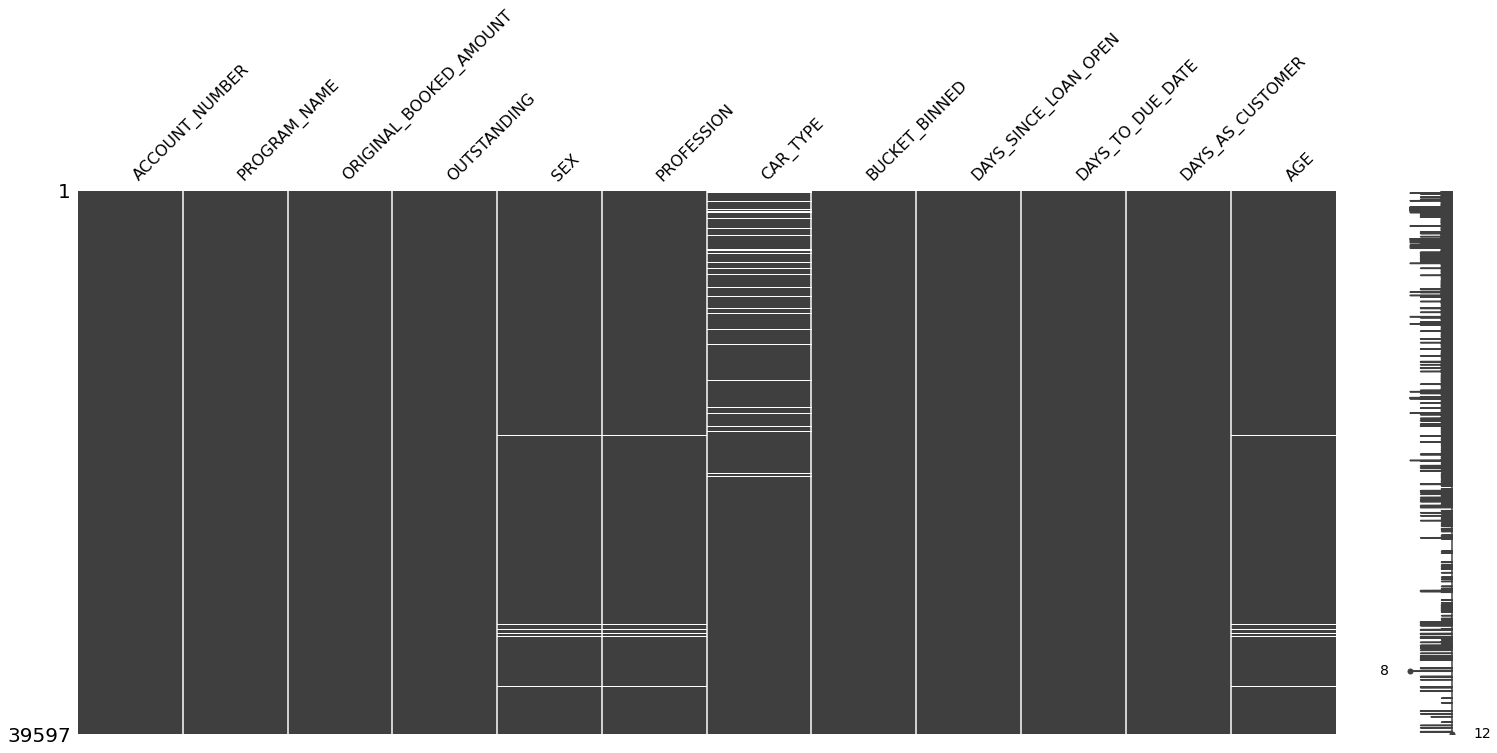

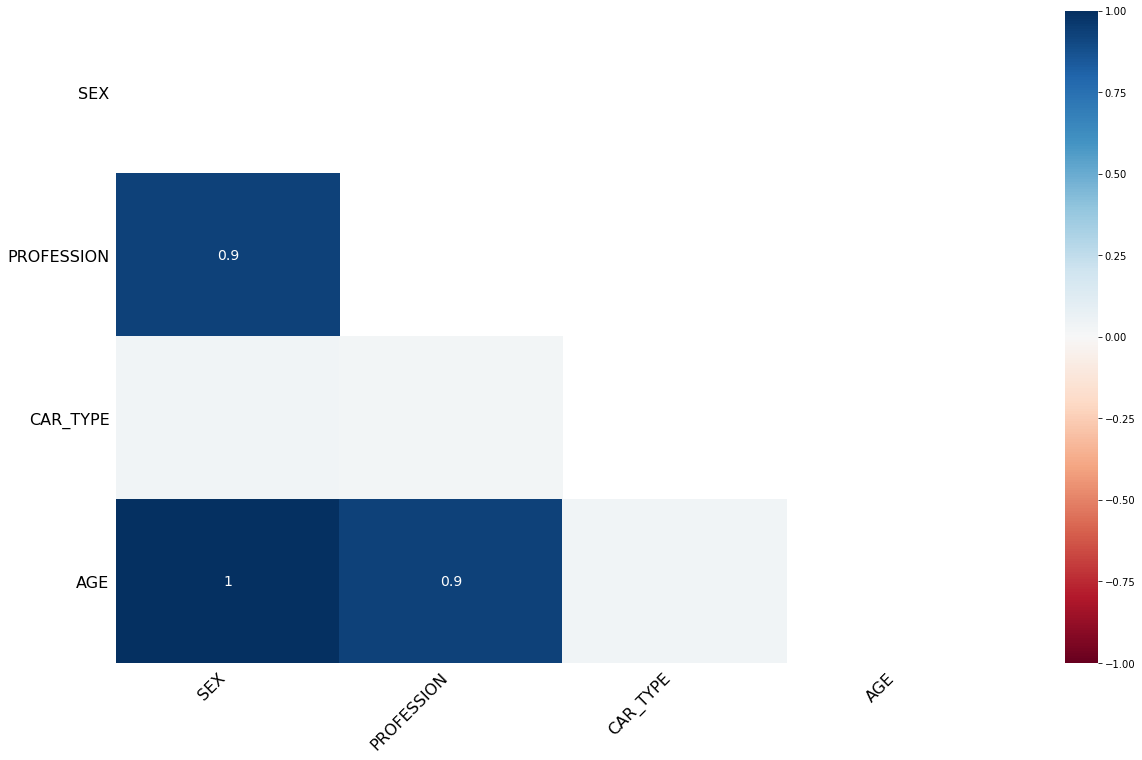

In [17]:
# Missing values 
print("missing values:\n")
data_account_level.isnull().sum()

# Visualize missing values as a matrix/heatmap to identify Missing at random/not at random
msno.matrix(data_account_level)
msno.heatmap(data_account_level)

In [18]:
#ANALIZE MISSINGNESS based on PROGRAM NAME

data_account_level[["SEX", "AGE", "PROFESSION", "CAR_TYPE"]].isnull().groupby(data_account_level['PROGRAM_NAME']).sum()

,SEX,AGE,PROFESSION,CAR_TYPE
PROGRAM_NAME,,,,
Auto Loans 20% Down Payment - Employed,0,0,1,25
Auto Loans 20% Down Payment - Self Employed,0,0,0,9
Auto Loans 30% Down Payment - Employed,0,0,5,120
Auto Loans 30% Down Payment - Self Employed,0,0,1,14
Auto Loans 30% Down Payment Used Cars - Employed,0,0,0,0
Auto Loans 30% Down Payment Used Cars - Self Employed,0,0,0,0
Auto Loans 40% Down Payment - Employed,0,0,3,283
Auto Loans 40% Down Payment - Self Employed,0,0,7,191
Auto Loans 50% Down Payment - Employed,0,0,5,600


In [19]:
# missingness report and recomendations

print("Missingness report and recomendations: \n\n-MNAR:AGE,PROFESSION and SEX are highly correlated amongst themselves and with Auto Loans Corporate Guarantee group in Program name and seems to be MNAR.\n-MAR: Car_Type seems to be MAR and should be imputed on both datasets.\n\n-RECOMENDATIONS: \n1)SPLIT the dataset on PROGRAM_NAME= Auto loans Corporate Guarantee as data_corporate and drop AGE,SEX and PROFESSION \n2)Reat of data to be included as data_individual \n3)Impute MAR on both data_corporate and data_individual")

Missingness report and recomendations: 

-MNAR:AGE,PROFESSION and SEX are highly correlated amongst themselves and with Auto Loans Corporate Guarantee group in Program name and seems to be MNAR.
-MAR: Car_Type seems to be MAR and should be imputed on both datasets.

-RECOMENDATIONS: 
1)SPLIT the dataset on PROGRAM_NAME= Auto loans Corporate Guarantee as data_corporate and drop AGE,SEX and PROFESSION 
2)Reat of data to be included as data_individual 
3)Impute MAR on both data_corporate and data_individual


## 6) Split dataset into corporate/individual segments based on MNAR

In [20]:
# Split data into data_corporate and data_individual to be processed separately

data_corporate = data_account_level.groupby(data.PROGRAM_NAME).get_group("Auto Loans Corporate Guarantee") # set subgroup as data_corporate 
data_corporate.drop(["AGE","SEX","PROFESSION","PROGRAM_NAME"], axis=1, inplace=True) # drop inplace MNAR features
data_individual = data_account_level.drop(data_corporate.index) # Drop splited subgroup from original data and set it as data_individual

# Confirm data_corporate/data_individual split
print("Split succesful? : ",len(data_account_level)==len(data_corporate) + len(data_individual), "\nRUN scaling/imputations/model on each dataset individually:\n-data_corporate\n-data_individual")

Split succesful? :  True 
RUN scaling/imputations/model on each dataset individually:
-data_corporate
-data_individual


/Users/juanbalbi/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


## 7) Corporate dataset analysis/transformations/modelling/baseline

### 7.1) Corporate: Preliminary EDA

In [21]:
# Corporate EDA and Action Plan

print("\nshape: ", data_corporate.shape)
data_corporate.head(3)
data_corporate.info()
print("\nNulls; \n", data_corporate.isnull().sum())
print("\nTarget distribution; \n", data_corporate["BUCKET_BINNED"].value_counts())
print("\n\nActions:  \n-Impute missing values \n-Remove outliers \n-Scale data \n-Perform final eda before modelling \n-Train Model \n-Get Accuracy metric as baseline")


shape:  (278, 8)


,ACCOUNT_NUMBER,ORIGINAL_BOOKED_AMOUNT,OUTSTANDING,CAR_TYPE,BUCKET_BINNED,DAYS_SINCE_LOAN_OPEN,DAYS_TO_DUE_DATE,DAYS_AS_CUSTOMER
2531,2532,64000,2844,NaN,0,3798,1974,7598
1097,1098,66000,6015,HYUNDAI,0,3764,1938,4389
66706,16833,66000,3042,HYUNDAI,1,3764,1938,4389


<class 'pandas.core.frame.DataFrame'>
Int64Index: 278 entries, 2531 to 888652
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ACCOUNT_NUMBER          278 non-null    int64 
 1   ORIGINAL_BOOKED_AMOUNT  278 non-null    int64 
 2   OUTSTANDING             278 non-null    int64 
 3   CAR_TYPE                236 non-null    object
 4   BUCKET_BINNED           278 non-null    int64 
 5   DAYS_SINCE_LOAN_OPEN    278 non-null    int64 
 6   DAYS_TO_DUE_DATE        278 non-null    int64 
 7   DAYS_AS_CUSTOMER        278 non-null    int64 
dtypes: int64(7), object(1)
memory usage: 19.5+ KB

Nulls; 
 ACCOUNT_NUMBER             0
ORIGINAL_BOOKED_AMOUNT     0
OUTSTANDING                0
CAR_TYPE                  42
BUCKET_BINNED              0
DAYS_SINCE_LOAN_OPEN       0
DAYS_TO_DUE_DATE           0
DAYS_AS_CUSTOMER           0
dtype: int64

Target distribution; 
 0    235
1     43
Name: BUCKET_BINNED, d

### 7.2) Corporate: Impute MAR values using most frequent value
##### (attempted to implement KNN imputation but could not make it work)

In [22]:
# identify missing values

data_corporate.isnull().sum()

ACCOUNT_NUMBER             0
ORIGINAL_BOOKED_AMOUNT     0
OUTSTANDING                0
CAR_TYPE                  42
BUCKET_BINNED              0
DAYS_SINCE_LOAN_OPEN       0
DAYS_TO_DUE_DATE           0
DAYS_AS_CUSTOMER           0
dtype: int64

In [23]:
# Function to replace NAN values with most frequent value/mode

def impute_nan_most_frequent_category(DataFrame,ColName):
    # .mode()[0] - gives first category name
     most_frequent_category=DataFrame[ColName].mode()[0]
    
    # replace nan values with most occured category
     DataFrame[ColName + "_Imputed"] = DataFrame[ColName]
     DataFrame[ColName + "_Imputed"].fillna(most_frequent_category,inplace=True)


In [24]:
# Impute by calling function to impute most occured category

impute_nan_most_frequent_category(data_corporate,"CAR_TYPE")
    
# Drop actual columns
data_corporate.drop("CAR_TYPE", axis=1, inplace=True)

data_corporate.head(1) # confirm imputation
data_corporate.isnull().sum() # confirm imputation

/Users/juanbalbi/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
/Users/juanbalbi/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:6383: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/Users/juanbalbi/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.or

,ACCOUNT_NUMBER,ORIGINAL_BOOKED_AMOUNT,OUTSTANDING,BUCKET_BINNED,DAYS_SINCE_LOAN_OPEN,DAYS_TO_DUE_DATE,DAYS_AS_CUSTOMER,CAR_TYPE_Imputed
2531,2532,64000,2844,0,3798,1974,7598,HYUNDAI


ACCOUNT_NUMBER            0
ORIGINAL_BOOKED_AMOUNT    0
OUTSTANDING               0
BUCKET_BINNED             0
DAYS_SINCE_LOAN_OPEN      0
DAYS_TO_DUE_DATE          0
DAYS_AS_CUSTOMER          0
CAR_TYPE_Imputed          0
dtype: int64

### 7.3) Corporate: Outlier detection/removal and Scaling

In [25]:
# create numerical/categorical lists and print them out

data_c_numerical = list(data_corporate.select_dtypes(include=['number'])) 
data_c_numerical = [e for e in data_c_numerical if e not in ("ACCOUNT_NUMBER", "BUCKET_BINNED")]

data_c_categorical = list(data_corporate.select_dtypes(exclude=['number']))

print("Numerical:", data_c_numerical)
print("Categorical:", data_c_categorical)

Numerical: ['ORIGINAL_BOOKED_AMOUNT', 'OUTSTANDING', 'DAYS_SINCE_LOAN_OPEN', 'DAYS_TO_DUE_DATE', 'DAYS_AS_CUSTOMER']
Categorical: ['CAR_TYPE_Imputed']


In [26]:
#detect and remove outliers in numerical features

Q1 = data_corporate[data_c_numerical].quantile(0.25)
Q3 = data_corporate[data_c_numerical].quantile(0.75)
IQR = Q3 - Q1

data_corporate = data_corporate[~((data_corporate[data_c_numerical] < (Q1 - 1.5 * IQR)) |(data_corporate[data_c_numerical] > (Q3 + 1.5 * IQR))).any(axis=1)]


In [27]:
# Scale numerical features

from sklearn.preprocessing import StandardScaler # import scaler

scaler = StandardScaler() # set scaler

data_corporate[data_c_numerical] = scaler.fit_transform(data_corporate[data_c_numerical]) # run scalar

data_corporate.head(3) # confirm scaling

,ACCOUNT_NUMBER,ORIGINAL_BOOKED_AMOUNT,OUTSTANDING,BUCKET_BINNED,DAYS_SINCE_LOAN_OPEN,DAYS_TO_DUE_DATE,DAYS_AS_CUSTOMER,CAR_TYPE_Imputed
2531,2532,-1,-1,0,2,2,0,HYUNDAI
9015,9016,0,-1,0,2,2,0,HYUNDAI
21186,21187,0,-1,0,2,2,0,HYUNDAI


### 7.4) Corporate: dummy encode  categoricals for logistic regression
##### (attempted to implement forward and backwards feature selection after dummy encoding but could not make it work)

In [28]:
# data_corporate shape after outlier removal

data_corporate.shape

(199, 8)

In [29]:
# Dummy encode categorical columns for KNN imputation and logistic regression

dc_cat_variables = data_corporate[data_c_categorical]  # set categorical columns to be encoded

dc_cat_dummies = pd.get_dummies(dc_cat_variables) # dummy encode categorical columns
dc_cat_dummies = dc_cat_dummies.astype("Int64")

dc_cat_dummies.head(3)  # confirm encoding

,CAR_TYPE_Imputed_BAIC,CAR_TYPE_Imputed_BMW,CAR_TYPE_Imputed_Brilliance,CAR_TYPE_Imputed_CHERY,CAR_TYPE_Imputed_CHEVROLET,CAR_TYPE_Imputed_Citroen,CAR_TYPE_Imputed_FIAT,CAR_TYPE_Imputed_FORD,CAR_TYPE_Imputed_HYUNDAI,CAR_TYPE_Imputed_Jack,...,CAR_TYPE_Imputed_MERCEDES,CAR_TYPE_Imputed_MITSUBISHI,CAR_TYPE_Imputed_NISSAN,CAR_TYPE_Imputed_OPEL,CAR_TYPE_Imputed_Peugeot,CAR_TYPE_Imputed_RENAULT,CAR_TYPE_Imputed_SKODA,CAR_TYPE_Imputed_SUBARU,CAR_TYPE_Imputed_TOYOTA,CAR_TYPE_Imputed_VOLKSWAGEN
2531,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9015,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
21186,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
# Drop dummy encoded original column and concat new dummy columns

data_corporate = pd.concat([ data_corporate, dc_cat_dummies], axis=1) # Concat the two dataframes together
data_corporate.drop("CAR_TYPE_Imputed", axis=1, inplace=True)

data_corporate.head(3)  # confirm drop/concat

,ACCOUNT_NUMBER,ORIGINAL_BOOKED_AMOUNT,OUTSTANDING,BUCKET_BINNED,DAYS_SINCE_LOAN_OPEN,DAYS_TO_DUE_DATE,DAYS_AS_CUSTOMER,CAR_TYPE_Imputed_BAIC,CAR_TYPE_Imputed_BMW,CAR_TYPE_Imputed_Brilliance,...,CAR_TYPE_Imputed_MERCEDES,CAR_TYPE_Imputed_MITSUBISHI,CAR_TYPE_Imputed_NISSAN,CAR_TYPE_Imputed_OPEL,CAR_TYPE_Imputed_Peugeot,CAR_TYPE_Imputed_RENAULT,CAR_TYPE_Imputed_SKODA,CAR_TYPE_Imputed_SUBARU,CAR_TYPE_Imputed_TOYOTA,CAR_TYPE_Imputed_VOLKSWAGEN
2531,2532,-1,-1,0,2,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9015,9016,0,-1,0,2,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21186,21187,0,-1,0,2,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 7.5) Corporate: EDA

In [31]:
# EDA

data_corporate.shape
data_corporate.head()
data_corporate.info()
data_corporate.describe()

(199, 29)

,ACCOUNT_NUMBER,ORIGINAL_BOOKED_AMOUNT,OUTSTANDING,BUCKET_BINNED,DAYS_SINCE_LOAN_OPEN,DAYS_TO_DUE_DATE,DAYS_AS_CUSTOMER,CAR_TYPE_Imputed_BAIC,CAR_TYPE_Imputed_BMW,CAR_TYPE_Imputed_Brilliance,...,CAR_TYPE_Imputed_MERCEDES,CAR_TYPE_Imputed_MITSUBISHI,CAR_TYPE_Imputed_NISSAN,CAR_TYPE_Imputed_OPEL,CAR_TYPE_Imputed_Peugeot,CAR_TYPE_Imputed_RENAULT,CAR_TYPE_Imputed_SKODA,CAR_TYPE_Imputed_SUBARU,CAR_TYPE_Imputed_TOYOTA,CAR_TYPE_Imputed_VOLKSWAGEN
2531,2532,-1,-1,0,2,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9015,9016,0,-1,0,2,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21186,21187,0,-1,0,2,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20706,20707,0,-1,0,2,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11215,11216,-1,-1,0,1,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 199 entries, 2531 to 861826
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ACCOUNT_NUMBER               199 non-null    int64  
 1   ORIGINAL_BOOKED_AMOUNT       199 non-null    float64
 2   OUTSTANDING                  199 non-null    float64
 3   BUCKET_BINNED                199 non-null    int64  
 4   DAYS_SINCE_LOAN_OPEN         199 non-null    float64
 5   DAYS_TO_DUE_DATE             199 non-null    float64
 6   DAYS_AS_CUSTOMER             199 non-null    float64
 7   CAR_TYPE_Imputed_BAIC        199 non-null    Int64  
 8   CAR_TYPE_Imputed_BMW         199 non-null    Int64  
 9   CAR_TYPE_Imputed_Brilliance  199 non-null    Int64  
 10  CAR_TYPE_Imputed_CHERY       199 non-null    Int64  
 11  CAR_TYPE_Imputed_CHEVROLET   199 non-null    Int64  
 12  CAR_TYPE_Imputed_Citroen     199 non-null    Int64  
 13  CAR_TYPE_Imput

,ACCOUNT_NUMBER,ORIGINAL_BOOKED_AMOUNT,OUTSTANDING,BUCKET_BINNED,DAYS_SINCE_LOAN_OPEN,DAYS_TO_DUE_DATE,DAYS_AS_CUSTOMER,CAR_TYPE_Imputed_BAIC,CAR_TYPE_Imputed_BMW,CAR_TYPE_Imputed_Brilliance,...,CAR_TYPE_Imputed_MERCEDES,CAR_TYPE_Imputed_MITSUBISHI,CAR_TYPE_Imputed_NISSAN,CAR_TYPE_Imputed_OPEL,CAR_TYPE_Imputed_Peugeot,CAR_TYPE_Imputed_RENAULT,CAR_TYPE_Imputed_SKODA,CAR_TYPE_Imputed_SUBARU,CAR_TYPE_Imputed_TOYOTA,CAR_TYPE_Imputed_VOLKSWAGEN
count,199,199,199,199,199,199,199,199,199,199,...,199,199,199,199,199,199,199,199,199,199
mean,"18,739",0,-0,0,-0,-0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
std,"11,736",1,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
min,302,-2,-1,0,-2,-2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25%,"8,312",-1,-1,0,-1,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50%,"17,508",0,-0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
75%,"31,814",1,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
max,"36,714",3,2,1,2,2,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1


### 7.6 ) Corporate:  Logit regression and Baseline metrics

In [32]:
# Import libraries needed

import pandas as pd
import numpy as np
from sklearn import metrics 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [33]:
# Set X and Y for split/model

Xc = data_corporate
yc = data_corporate["BUCKET_BINNED"]
Xc.drop(["ACCOUNT_NUMBER", "BUCKET_BINNED"], axis=1, inplace=True)


In [34]:
# Function to split/train/evaluate logistic regression model

from sklearn.metrics import accuracy_score, f1_score, recall_score, matthews_corrcoef

def evaluate_LogReg(X, y,
                    metric: str='accuracy',
                    seed: int=123,
                    printout: bool=False):
    """
    Fits a logistic regression with the training set, and evaluates it with 
    the test set, using Accuracy, F1, Recall or MCC metrics.

    Params
      X: A Pandas DataFrame with all the values to be used to fit the logit
      y: The dependent variable.
      metric: The metric to be returned
      printout: True/False indicating whether you want to print results

    """
    # Split the data 
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state= 123, )

    # Train Model
    lr = LogisticRegression().fit(X_train, y_train)
    y_hat = lr.predict(X_test)

    # Metrics
    accuracy = accuracy_score(y_test, y_hat)
    F1 = f1_score(y_test, y_hat)
    recall = recall_score(y_test, y_hat)
    MCC = matthews_corrcoef(y_test, y_hat)
    
    if printout is True:
        print('Accuracy:', accuracy)
        print('F1:', F1)
        print('Recall:', recall)
        print('MCC:', MCC)
    
    return eval(metric)

### 7.7) Corporate:  Final Result/Baseline Metrics

In [35]:
# call evaluate_LogReg function to split/train/evaluate logistic regression model with set X,y

corporate_accuracy = evaluate_LogReg(Xc, yc)
corporate_accuracy

0.825

## 8) Individual segment analysis/transformations/modelling 

### 8.1) Individual: Preliminary EDA

In [36]:
# Individual EDA and Action Plan

print("\nshape: ", data_individual.shape)
data_individual.head(3)
data_individual.info()
print("\nNulls; \n", data_individual.isnull().sum())
print("\nTarget distribution; \n", data_individual["BUCKET_BINNED"].value_counts())
print("\n\nActions:  \n-Impute missing values \n-Remove outliers \n-Scale data \n-Perform final eda before modelling \n-Train Model \n-Get Accuracy metric as baseline")


shape:  (39319, 12)


,ACCOUNT_NUMBER,PROGRAM_NAME,ORIGINAL_BOOKED_AMOUNT,OUTSTANDING,SEX,PROFESSION,CAR_TYPE,BUCKET_BINNED,DAYS_SINCE_LOAN_OPEN,DAYS_TO_DUE_DATE,DAYS_AS_CUSTOMER,AGE
5702,5703,Auto Loans 40% Down Payment - Employed,96000,4220,F,Company Owner,NaN,1,4359,2028,4417,52
151957,21086,Auto Loans 40% Down Payment - Employed,63600,0,F,HOUSEWIFE,HYUNDAI,0,4276,1877,4780,53
32457,6243,Auto Loans 40% Down Payment - Self Employed,41400,0,M,Shop Owner,NaN,1,4197,1938,4204,41


<class 'pandas.core.frame.DataFrame'>
Int64Index: 39319 entries, 5702 to 888334
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ACCOUNT_NUMBER          39319 non-null  int64 
 1   PROGRAM_NAME            39319 non-null  object
 2   ORIGINAL_BOOKED_AMOUNT  39319 non-null  int64 
 3   OUTSTANDING             39319 non-null  int64 
 4   SEX                     39319 non-null  object
 5   PROFESSION              39281 non-null  object
 6   CAR_TYPE                37059 non-null  object
 7   BUCKET_BINNED           39319 non-null  int64 
 8   DAYS_SINCE_LOAN_OPEN    39319 non-null  int64 
 9   DAYS_TO_DUE_DATE        39319 non-null  int64 
 10  DAYS_AS_CUSTOMER        39319 non-null  int64 
 11  AGE                     39319 non-null  Int64 
dtypes: Int64(1), int64(7), object(4)
memory usage: 3.9+ MB

Nulls; 
 ACCOUNT_NUMBER               0
PROGRAM_NAME                 0
ORIGINAL_BOOKED_AMOUNT     

### 8.2) Individual: Impute MAR values using most frequent value
##### (attempted to implement KNN imputation but could not make it work)

In [37]:
# identify missing values

data_individual.isnull().sum()

ACCOUNT_NUMBER               0
PROGRAM_NAME                 0
ORIGINAL_BOOKED_AMOUNT       0
OUTSTANDING                  0
SEX                          0
PROFESSION                  38
CAR_TYPE                  2260
BUCKET_BINNED                0
DAYS_SINCE_LOAN_OPEN         0
DAYS_TO_DUE_DATE             0
DAYS_AS_CUSTOMER             0
AGE                          0
dtype: int64

In [38]:
#  Impute by calling function to impute most occured category
# (impute_nan_most_frequent_category function can be found on 7.2)

impute_nan_most_frequent_category(data_individual, "PROFESSION")
impute_nan_most_frequent_category(data_individual, "CAR_TYPE")   

# Drop actual columns
data_individual.drop(["PROFESSION","CAR_TYPE"], axis=1, inplace=True)

data_individual.head(1) # confirm imputation
data_individual.isnull().sum() # confirm imputation

,ACCOUNT_NUMBER,PROGRAM_NAME,ORIGINAL_BOOKED_AMOUNT,OUTSTANDING,SEX,BUCKET_BINNED,DAYS_SINCE_LOAN_OPEN,DAYS_TO_DUE_DATE,DAYS_AS_CUSTOMER,AGE,PROFESSION_Imputed,CAR_TYPE_Imputed
5702,5703,Auto Loans 40% Down Payment - Employed,96000,4220,F,1,4359,2028,4417,52,Company Owner,HYUNDAI


ACCOUNT_NUMBER            0
PROGRAM_NAME              0
ORIGINAL_BOOKED_AMOUNT    0
OUTSTANDING               0
SEX                       0
BUCKET_BINNED             0
DAYS_SINCE_LOAN_OPEN      0
DAYS_TO_DUE_DATE          0
DAYS_AS_CUSTOMER          0
AGE                       0
PROFESSION_Imputed        0
CAR_TYPE_Imputed          0
dtype: int64

### 8.3) Individual: Outlier detection/removal and Scaling

In [39]:
data_i_numerical = list(data_individual.select_dtypes(include=['number'])) 
data_i_numerical = [e for e in data_i_numerical if e not in ("ACCOUNT_NUMBER", "BUCKET_BINNED")]

data_i_categorical = list(data_individual.select_dtypes(exclude=['number']))

print("Numerical:", data_i_numerical)
print("Categorical:", data_i_categorical)

Numerical: ['ORIGINAL_BOOKED_AMOUNT', 'OUTSTANDING', 'DAYS_SINCE_LOAN_OPEN', 'DAYS_TO_DUE_DATE', 'DAYS_AS_CUSTOMER', 'AGE']
Categorical: ['PROGRAM_NAME', 'SEX', 'PROFESSION_Imputed', 'CAR_TYPE_Imputed']


In [40]:
# detect and remove outliers in numerical features

Q1 = data_individual[data_c_numerical].quantile(0.25)
Q3 = data_individual[data_c_numerical].quantile(0.75)

IQR = Q3 - Q1

data_individual = data_individual[~((data_individual[data_i_numerical] < (Q1 - 1.5 * IQR)) |(data_individual[data_i_numerical] > (Q3 + 1.5 * IQR))).any(axis=1)]


<ipython-input-40-f6f68a79235f>:8: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data_individual = data_individual[~((data_individual[data_i_numerical] < (Q1 - 1.5 * IQR)) |(data_individual[data_i_numerical] > (Q3 + 1.5 * IQR))).any(axis=1)]
<ipython-input-40-f6f68a79235f>:8: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data_individual = data_individual[~((data_individual[data_i_numerical] < (Q1 - 1.5 * IQR)) |(data_individual[data_i_numerical] > (Q3 + 1.5 * IQR))).any(axis=1)]


In [41]:
# Scale numerical features

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # scaler

data_individual[data_i_numerical] = scaler.fit_transform(data_individual[data_i_numerical]) # Scale

data_individual.head(3) # confirm scaling

,ACCOUNT_NUMBER,PROGRAM_NAME,ORIGINAL_BOOKED_AMOUNT,OUTSTANDING,SEX,BUCKET_BINNED,DAYS_SINCE_LOAN_OPEN,DAYS_TO_DUE_DATE,DAYS_AS_CUSTOMER,AGE,PROFESSION_Imputed,CAR_TYPE_Imputed
19153,19154,Auto Loans 50% Down Payment - Self Employed,-1,-1,M,1,3,2,2,2,RETIRED,HYUNDAI
66253,1110,Auto Loans 20% Down Payment - Employed,-1,-1,M,1,3,2,2,2,Manager,HYUNDAI
47903,15183,Auto Loans 50% Down Payment - Employed,-1,-1,M,1,3,2,2,-0,Company Owner,HYUNDAI


### 8.4) Individual: dummy encode  categoricals for logistic regression

In [42]:
# data_corporate shape after outlier removal
data_individual.shape

(36251, 12)

In [43]:
# Dummy encode categorical columns for KNN imputation and logistic regression

di_cat_variables = data_individual[data_i_categorical]  # set categorical columns to be encoded

di_cat_dummies = pd.get_dummies(di_cat_variables) # dummy encode categorical columns
di_cat_dummies = di_cat_dummies.astype("Int64")

di_cat_dummies.head(3)  # confirm encoding

,PROGRAM_NAME_Auto Loans 20% Down Payment - Employed,PROGRAM_NAME_Auto Loans 20% Down Payment - Self Employed,PROGRAM_NAME_Auto Loans 30% Down Payment - Employed,PROGRAM_NAME_Auto Loans 30% Down Payment - Self Employed,PROGRAM_NAME_Auto Loans 30% Down Payment Used Cars - Employed,PROGRAM_NAME_Auto Loans 30% Down Payment Used Cars - Self Employed,PROGRAM_NAME_Auto Loans 40% Down Payment - Employed,PROGRAM_NAME_Auto Loans 40% Down Payment - Self Employed,PROGRAM_NAME_Auto Loans 50% Down Payment - Employed,PROGRAM_NAME_Auto Loans 50% Down Payment - Self Employed,...,CAR_TYPE_Imputed_SUZUKI,CAR_TYPE_Imputed_Saipa,CAR_TYPE_Imputed_Speranza,CAR_TYPE_Imputed_Ssang Yong,CAR_TYPE_Imputed_TOYOTA,CAR_TYPE_Imputed_VICTORY,CAR_TYPE_Imputed_VOLKSWAGEN,CAR_TYPE_Imputed_VOLVO,CAR_TYPE_Imputed_ZEMEX,CAR_TYPE_Imputed_Zoty
19153,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
66253,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47903,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
# Drop dummy encoded original column and concat new dummy columns

data_individual = pd.concat([ data_individual, di_cat_dummies], axis=1) # Concat the two dataframes together
data_individual.drop(['PROGRAM_NAME', 'SEX', 'PROFESSION_Imputed', 'CAR_TYPE_Imputed'],  axis=1, inplace=True)

data_individual.head(3)  # confirm drop/concat

,ACCOUNT_NUMBER,ORIGINAL_BOOKED_AMOUNT,OUTSTANDING,BUCKET_BINNED,DAYS_SINCE_LOAN_OPEN,DAYS_TO_DUE_DATE,DAYS_AS_CUSTOMER,AGE,PROGRAM_NAME_Auto Loans 20% Down Payment - Employed,PROGRAM_NAME_Auto Loans 20% Down Payment - Self Employed,...,CAR_TYPE_Imputed_SUZUKI,CAR_TYPE_Imputed_Saipa,CAR_TYPE_Imputed_Speranza,CAR_TYPE_Imputed_Ssang Yong,CAR_TYPE_Imputed_TOYOTA,CAR_TYPE_Imputed_VICTORY,CAR_TYPE_Imputed_VOLKSWAGEN,CAR_TYPE_Imputed_VOLVO,CAR_TYPE_Imputed_ZEMEX,CAR_TYPE_Imputed_Zoty
19153,19154,-1,-1,1,3,2,2,2,0,0,...,0,0,0,0,0,0,0,0,0,0
66253,1110,-1,-1,1,3,2,2,2,1,0,...,0,0,0,0,0,0,0,0,0,0
47903,15183,-1,-1,1,3,2,2,-0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 8.5) Individual: EDA

In [45]:
# run final EDA before trainning model

data_individual.shape
data_individual.head()
data_individual.info()
data_individual.describe()

(36251, 142)

,ACCOUNT_NUMBER,ORIGINAL_BOOKED_AMOUNT,OUTSTANDING,BUCKET_BINNED,DAYS_SINCE_LOAN_OPEN,DAYS_TO_DUE_DATE,DAYS_AS_CUSTOMER,AGE,PROGRAM_NAME_Auto Loans 20% Down Payment - Employed,PROGRAM_NAME_Auto Loans 20% Down Payment - Self Employed,...,CAR_TYPE_Imputed_SUZUKI,CAR_TYPE_Imputed_Saipa,CAR_TYPE_Imputed_Speranza,CAR_TYPE_Imputed_Ssang Yong,CAR_TYPE_Imputed_TOYOTA,CAR_TYPE_Imputed_VICTORY,CAR_TYPE_Imputed_VOLKSWAGEN,CAR_TYPE_Imputed_VOLVO,CAR_TYPE_Imputed_ZEMEX,CAR_TYPE_Imputed_Zoty
19153,19154,-1,-1,1,3,2,2,2,0,0,...,0,0,0,0,0,0,0,0,0,0
66253,1110,-1,-1,1,3,2,2,2,1,0,...,0,0,0,0,0,0,0,0,0,0
47903,15183,-1,-1,1,3,2,2,-0,0,0,...,0,0,0,0,0,0,0,0,0,0
19033,19034,-1,-1,1,3,2,2,-0,0,0,...,0,0,0,0,0,0,0,0,0,0
4724,4725,-1,-1,0,3,2,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 36251 entries, 19153 to 894529
Columns: 142 entries, ACCOUNT_NUMBER to CAR_TYPE_Imputed_Zoty
dtypes: Int64(134), float64(6), int64(2)
memory usage: 44.2 MB


,ACCOUNT_NUMBER,ORIGINAL_BOOKED_AMOUNT,OUTSTANDING,BUCKET_BINNED,DAYS_SINCE_LOAN_OPEN,DAYS_TO_DUE_DATE,DAYS_AS_CUSTOMER,AGE,PROGRAM_NAME_Auto Loans 20% Down Payment - Employed,PROGRAM_NAME_Auto Loans 20% Down Payment - Self Employed,...,CAR_TYPE_Imputed_SUZUKI,CAR_TYPE_Imputed_Saipa,CAR_TYPE_Imputed_Speranza,CAR_TYPE_Imputed_Ssang Yong,CAR_TYPE_Imputed_TOYOTA,CAR_TYPE_Imputed_VICTORY,CAR_TYPE_Imputed_VOLKSWAGEN,CAR_TYPE_Imputed_VOLVO,CAR_TYPE_Imputed_ZEMEX,CAR_TYPE_Imputed_Zoty
count,"36,251","36,251","36,251","36,251","36,251","36,251","36,251","36,251","36,251","36,251",...,"36,251","36,251","36,251","36,251","36,251","36,251","36,251","36,251","36,251","36,251"
mean,"19,413",-0,-0,0,-0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
std,"11,261",1,1,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
min,1,-2,-1,0,-2,-3,-2,-2,0,0,...,0,0,0,0,0,0,0,0,0,0
25%,"9,694",-1,-1,0,-1,-1,-1,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
50%,"19,350",-0,-0,0,0,0,0,-0,0,0,...,0,0,0,0,0,0,0,0,0,0
75%,"28,892",1,1,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
max,"39,597",3,3,1,3,2,3,3,1,1,...,1,1,1,1,1,1,1,1,1,1


### 8.6 ) Individual:  Logit regression and Baseline metrics

In [46]:
# set Xi and yi for trainning the model

Xi = data_individual
yi = data_individual["BUCKET_BINNED"]
Xi.drop(["ACCOUNT_NUMBER", "BUCKET_BINNED"], axis=1, inplace=True)

In [51]:
# call evaluate_LogReg function to split/train/evaluate logistic regression model with set X,y
individual_accuracy = evaluate_LogReg(Xi, yi,)

# display evaluation metric
individual_accuracy

/Users/juanbalbi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8201627361743208

## 9)  * Assignment Conclusion *

In [52]:
# Print final baselines

print("Accuracy Baseline for corporate segment: ", corporate_accuracy)
print("Accuracy Baseline for individual segment: ", individual_accuracy)

print("\nPROJECT COMPLETED!")

Baseline for corporate segment:  0.825
Baseline for individual segment:  0.8201627361743208

PROJECT COMPLETED!
